In [1]:
#Import necessary libraries
import cv2
import os
import json
import numpy as np
from skimage import feature
from matplotlib import pyplot as plt


array([[[191, 147, 134],
        [191, 147, 134],
        [191, 147, 134],
        ...,
        [126, 145, 128],
        [127, 147, 128],
        [128, 148, 129]],

       [[192, 148, 135],
        [192, 148, 135],
        [192, 148, 135],
        ...,
        [126, 145, 128],
        [127, 146, 129],
        [128, 148, 129]],

       [[192, 148, 135],
        [192, 148, 135],
        [192, 148, 135],
        ...,
        [127, 146, 129],
        [128, 147, 130],
        [129, 148, 131]],

       ...,

       [[ 96,  80, 103],
        [102,  86, 110],
        [ 97,  76, 108],
        ...,
        [ 41,  27,  39],
        [ 41,  27,  39],
        [ 41,  27,  39]],

       [[ 93,  79,  97],
        [103,  88, 109],
        [100,  81, 108],
        ...,
        [ 41,  27,  39],
        [ 41,  27,  39],
        [ 40,  26,  38]],

       [[ 88,  75,  91],
        [ 95,  81,  99],
        [103,  84, 109],
        ...,
        [ 40,  26,  38],
        [ 38,  24,  36],
        [ 40,  26,  38]]], dtype=uint8)
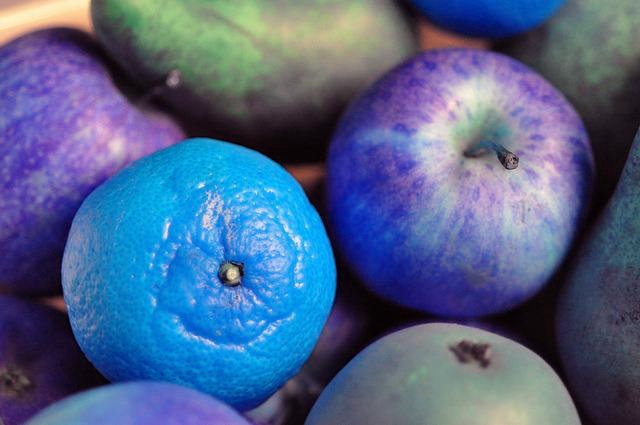

In [4]:
#Load the image
image_path = '/content/fruits.jpg'
image = cv2.imread(image_path)
image

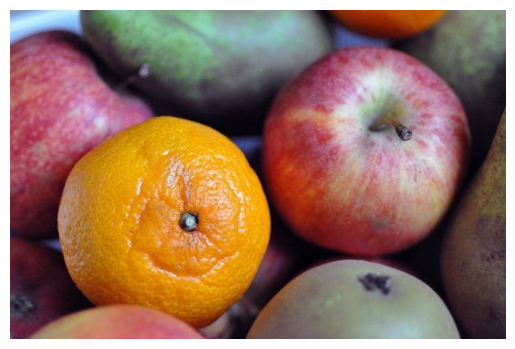

In [3]:
#convert image from BGR to RGB

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

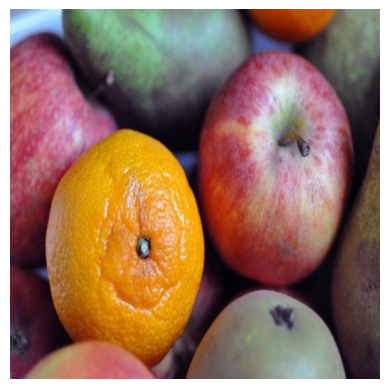

In [5]:
#resize teh image to 500x500 pixels

resized_image = cv2.resize(image_rgb, (500, 500))
#save the preprocessed image
cv2.imwrite('preprocessed_image.jpg', resized_image)

#display the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.show()

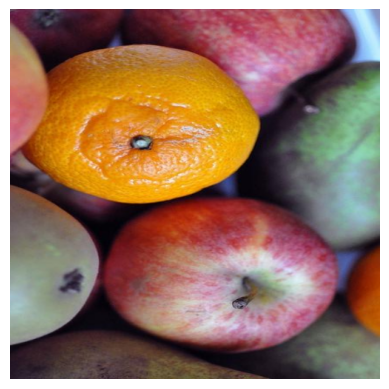

In [6]:
#rotate the image
rotated_image_90 = cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)

#Save the rotated image
cv2.imwrite('rotated_image.jpg', rotated_image_90)

#Display the rotated image using matplotlib
plt.imshow(rotated_image_90)
plt.axis('off')
plt.show()

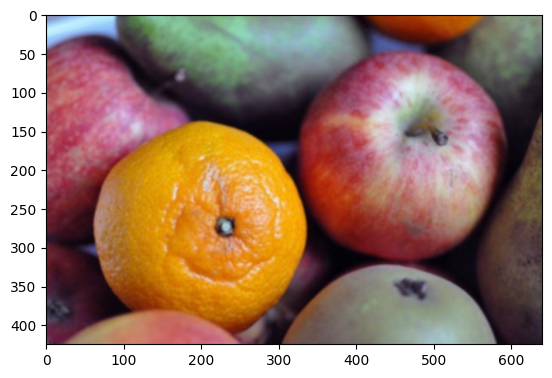

In [8]:
##Denoise the image
denoised_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

#Save the denoised image
cv2.imwrite('denoised_image.jpg', denoised_image)

#display the denoised image
plt.imshow(denoised_image)
plt.axis()
plt.show()

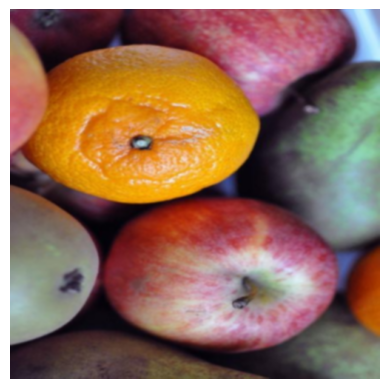

In [9]:
#Apply resize, rotation and denoise

image = cv2.imread('/content/fruits.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_rgb = cv2.resize(image_rgb, (500, 500))

image_rgb = cv2.rotate(image_rgb, cv2.ROTATE_90_CLOCKWISE)

image_rgb = cv2.GaussianBlur(image_rgb, (5, 5), 0)

cv2.imwrite('preprocessed_image.jpg', image_rgb)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [12]:
# "A processed fruit image with resizing, rotation, and denoising applied."
#Image annotation

metadata = {
    "processed_image.jpg": {
        "keywords": ["fruits", "Healthy food","green"],
        "description": "A processed fruit image with resizing, rotation, and denoising applied."
    }
}


In [13]:
#save metadata to a jsoj file

with open ('image_metadata.json', 'w') as json_file:
  json.dump(metadata, json_file, indent = 4)

In [17]:
#Image feature extraction
#calculate mean and norm of the pixel intensities
mean_intensity = np.mean(image_rgb)
norm_intensity = np.linalg.norm(image_rgb)

Area: 10.5, Perimeter: 69.01219236850739, Centroid: (321, 395), Bounding Box: (309, 391, 21, 10)
Area: 18.0, Perimeter: 116.56854140758514, Centroid: (307, 398), Bounding Box: (300, 386, 23, 20)
Area: 13.5, Perimeter: 113.15432786941528, Centroid: (76, 376), Bounding Box: (67, 367, 29, 16)
Area: 7.0, Perimeter: 68.28427064418793, Centroid: (322, 364), Bounding Box: (313, 361, 19, 16)
Area: 7.0, Perimeter: 35.79898941516876, Centroid: (95, 360), Bounding Box: (92, 355, 7, 12)
Area: 107.0, Perimeter: 738.2640616893768, Centroid: (84, 341), Bounding Box: (0, 237, 121, 218)
Area: 1.5, Perimeter: 47.55634880065918, Centroid: (222, 233), Bounding Box: (206, 230, 19, 6)
Area: 5.0, Perimeter: 71.11269783973694, Centroid: (188, 232), Bounding Box: (171, 230, 31, 5)
Area: 33.5, Perimeter: 23.071067690849304, Centroid: (163, 233), Bounding Box: (160, 230, 7, 8)
Area: 2.5, Perimeter: 44.3847758769989, Centroid: (233, 225), Bounding Box: (226, 221, 20, 8)
Area: 13.0, Perimeter: 94.91168677806854, C

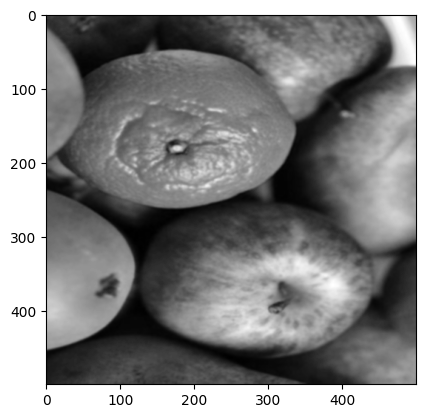

In [31]:
#extract shape features
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(gray_image, cmap='gray')


contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
  area = cv2.contourArea(contour)
  perimeter = cv2.arcLength(contour, True)

  moments= cv2.moments(contour)
  if moments['m00'] != 0:
    centroid_x = int(moments['m10'] / moments['m00'])
    centroid_y = int(moments['m01'] / moments['m00'])
  else:
    cX, cY = 0,0

  x,y,w,h = cv2.boundingRect(contour)

  print(f"Area: {area}, Perimeter: {perimeter}, Centroid: ({centroid_x}, {centroid_y}), Bounding Box: ({x}, {y}, {w}, {h})")

In [32]:
#collect all the shapes features as a dictionary
shape_feature = {
    "area": area,
    "perimeter": perimeter,
    "centroid": (cX,cY),
    "bounding_box":(x,y,w,h)
}



In [33]:
#collect all the features extracted from the processed_image and store as meta data

features_extracted = {
    "mean_intensity": mean_intensity,
    "norm_intensity": norm_intensity,
    "shape_features": shape_feature
}


In [34]:
#save to features to JSON
with open('features_extracted.json', 'w') as json_file:
  json.dump(features_extracted, json_file, indent=4)

In [38]:
#Text preprocessing

import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [50]:
#download stopwords and punkt tokensier

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [51]:
#Load the doc

with open ('/content/101551') as file:
  document_101551 = file.read()

In [52]:
document_sample = document_101551[621:-15]
document_sample


":\n|> : \tI have been active in defending Saturn lately on the net and would\n|> : like to state my full opinion on the subject, rather than just reply to others'\n|> : points.\n|> : \t\n|> : \tThe biggest problem some people seem to be having is that Saturn\n|> : Dealers make ~$2K on a car.  I think most will agree with me that the car is\n|> : comparably priced with its competitors, that is, they aren't overpriced \n|> : compared to most cars in their class.  I don't understand the point of \n|> : arguing over whether the dealer makes the $2K or not?  \n|> \n|> I have never understood what the big deal over dealer profits is either.\n|> The only thing that I can figure out is that people believe that if\n|> they minimize the dealer profit they will minimize their total out-of-pocket\n|> expenses for the car. While this may be true in some cases, I do not\n|> believe that it is generally true. I bought a Saturn SL in January of '92.\n|> AT THAT TIME, based on studying car prices, I d

In [53]:
document_sample_lower = document_sample.lower()
document_sample_lower

":\n|> : \ti have been active in defending saturn lately on the net and would\n|> : like to state my full opinion on the subject, rather than just reply to others'\n|> : points.\n|> : \t\n|> : \tthe biggest problem some people seem to be having is that saturn\n|> : dealers make ~$2k on a car.  i think most will agree with me that the car is\n|> : comparably priced with its competitors, that is, they aren't overpriced \n|> : compared to most cars in their class.  i don't understand the point of \n|> : arguing over whether the dealer makes the $2k or not?  \n|> \n|> i have never understood what the big deal over dealer profits is either.\n|> the only thing that i can figure out is that people believe that if\n|> they minimize the dealer profit they will minimize their total out-of-pocket\n|> expenses for the car. while this may be true in some cases, i do not\n|> believe that it is generally true. i bought a saturn sl in january of '92.\n|> at that time, based on studying car prices, i d

In [54]:
#Tokenization
tokens = word_tokenize(document_sample_lower)


In [55]:
tokens = [word for word in tokens if word not in string.punctuation]
tokens

['i',
 'have',
 'been',
 'active',
 'in',
 'defending',
 'saturn',
 'lately',
 'on',
 'the',
 'net',
 'and',
 'would',
 'like',
 'to',
 'state',
 'my',
 'full',
 'opinion',
 'on',
 'the',
 'subject',
 'rather',
 'than',
 'just',
 'reply',
 'to',
 'others',
 'points',
 'the',
 'biggest',
 'problem',
 'some',
 'people',
 'seem',
 'to',
 'be',
 'having',
 'is',
 'that',
 'saturn',
 'dealers',
 'make',
 '2k',
 'on',
 'a',
 'car',
 'i',
 'think',
 'most',
 'will',
 'agree',
 'with',
 'me',
 'that',
 'the',
 'car',
 'is',
 'comparably',
 'priced',
 'with',
 'its',
 'competitors',
 'that',
 'is',
 'they',
 'are',
 "n't",
 'overpriced',
 'compared',
 'to',
 'most',
 'cars',
 'in',
 'their',
 'class',
 'i',
 'do',
 "n't",
 'understand',
 'the',
 'point',
 'of',
 'arguing',
 'over',
 'whether',
 'the',
 'dealer',
 'makes',
 'the',
 '2k',
 'or',
 'not',
 'i',
 'have',
 'never',
 'understood',
 'what',
 'the',
 'big',
 'deal',
 'over',
 'dealer',
 'profits',
 'is',
 'either',
 'the',
 'only',
 'th

In [57]:
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
tokens

['active',
 'defending',
 'saturn',
 'lately',
 'net',
 'would',
 'like',
 'state',
 'full',
 'opinion',
 'subject',
 'rather',
 'reply',
 'others',
 'points',
 'biggest',
 'problem',
 'people',
 'seem',
 'saturn',
 'dealers',
 'make',
 '2k',
 'car',
 'think',
 'agree',
 'car',
 'comparably',
 'priced',
 'competitors',
 "n't",
 'overpriced',
 'compared',
 'cars',
 'class',
 "n't",
 'understand',
 'point',
 'arguing',
 'whether',
 'dealer',
 'makes',
 '2k',
 'never',
 'understood',
 'big',
 'deal',
 'dealer',
 'profits',
 'either',
 'thing',
 'figure',
 'people',
 'believe',
 'minimize',
 'dealer',
 'profit',
 'minimize',
 'total',
 'out-of-pocket',
 'expenses',
 'car',
 'may',
 'true',
 'cases',
 'believe',
 'generally',
 'true',
 'bought',
 'saturn',
 'sl',
 'january',
 "'92",
 'time',
 'based',
 'studying',
 'car',
 'prices',
 'decided',
 'comparable',
 'car',
 'priced',
 'cheaply',
 'saturn',
 'sure',
 'maybe',
 'could',
 'talked',
 'price',
 'car',
 'saturn',
 'price',
 'out-of-poc

In [58]:
print("Preprocessed Tokens:", tokens)

Preprocessed Tokens: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'points', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealers', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitors', "n't", 'overpriced', 'compared', 'cars', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'makes', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profits', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expenses', 'car', 'may', 'true', 'cases', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'prices', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expenses', 'would', "n't", 'different', "'s", 'important', 'much

In [59]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [60]:
stemmed_words = [stemmer.stem(word) for word in tokens]


In [61]:
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['activ', 'defend', 'saturn', 'late', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'repli', 'other', 'point', 'biggest', 'problem', 'peopl', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agre', 'car', 'compar', 'price', 'competitor', "n't", 'overpr', 'compar', 'car', 'class', "n't", 'understand', 'point', 'argu', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figur', 'peopl', 'believ', 'minim', 'dealer', 'profit', 'minim', 'total', 'out-of-pocket', 'expens', 'car', 'may', 'true', 'case', 'believ', 'gener', 'true', 'bought', 'saturn', 'sl', 'januari', "'92", 'time', 'base', 'studi', 'car', 'price', 'decid', 'compar', 'car', 'price', 'cheapli', 'saturn', 'sure', 'mayb', 'could', 'talk', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expens', 'would', "n't", 'differ', "'s", 'import', 'much', 'money', 'left', 'buy', 'car', 'reduc', 'dealer', 'profit', 'thing', 'sa

In [62]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['active', 'defending', 'saturn', 'lately', 'net', 'would', 'like', 'state', 'full', 'opinion', 'subject', 'rather', 'reply', 'others', 'point', 'biggest', 'problem', 'people', 'seem', 'saturn', 'dealer', 'make', '2k', 'car', 'think', 'agree', 'car', 'comparably', 'priced', 'competitor', "n't", 'overpriced', 'compared', 'car', 'class', "n't", 'understand', 'point', 'arguing', 'whether', 'dealer', 'make', '2k', 'never', 'understood', 'big', 'deal', 'dealer', 'profit', 'either', 'thing', 'figure', 'people', 'believe', 'minimize', 'dealer', 'profit', 'minimize', 'total', 'out-of-pocket', 'expense', 'car', 'may', 'true', 'case', 'believe', 'generally', 'true', 'bought', 'saturn', 'sl', 'january', "'92", 'time', 'based', 'studying', 'car', 'price', 'decided', 'comparable', 'car', 'priced', 'cheaply', 'saturn', 'sure', 'maybe', 'could', 'talked', 'price', 'car', 'saturn', 'price', 'out-of-pocket', 'expense', 'would', "n't", 'different', "'s", 'important', 'much', 'money', '